# Using Elbow Curve in Practice

Let's walk through an example of how to use the elbow curve. This time, we'll answer the question from the previous section on customer data and how many clusters would be ideal.

In [ ]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas

In [ ]:
# Load data
file_path = "Resources/shopping_data_cleaned.csv"
df_shopping = pd.read_csv(file_path)
df_shopping.head(10)

To create the elbow curve, remember there are two values we need: a list of K values and a list of inertia values. Recall that inertia is the objective function to plot K values against. We will loop through 10 values for K and determine the inertia:

In [ ]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
   km = KMeans(n_clusters=i, random_state=0)
   km.fit(df_shopping)
   inertia.append(km.inertia_)

In [ ]:
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

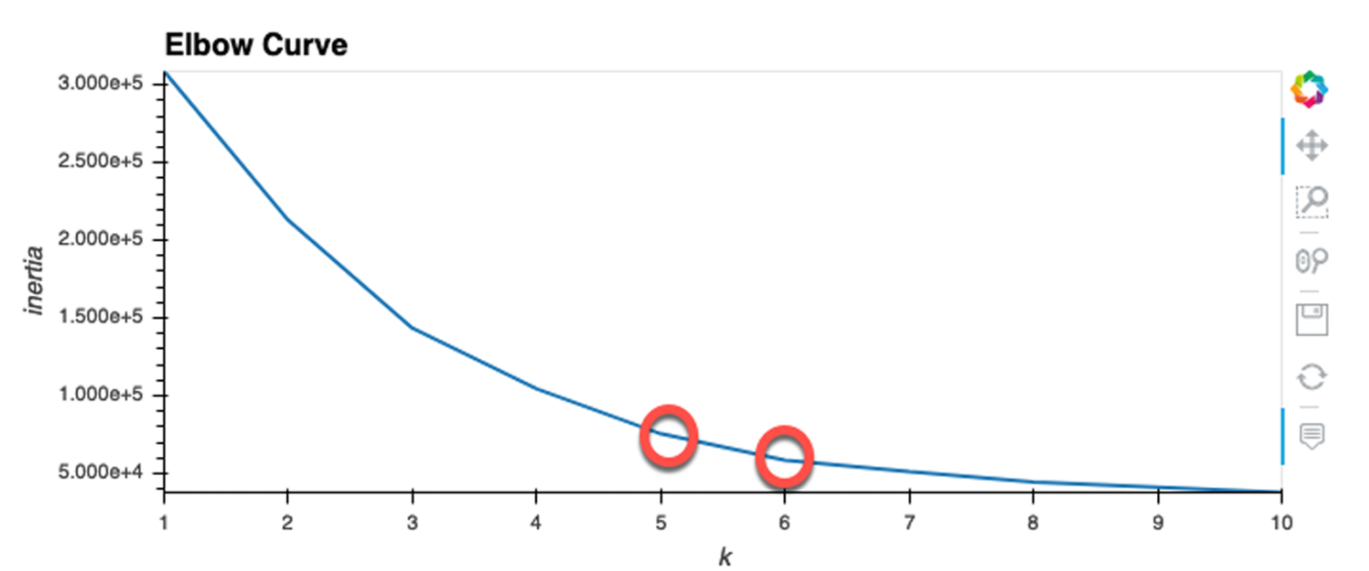

This elbow curve doesn't have as obvious of an elbow as previously seen. Either K values for points 5 or 6 could be considered the elbow. There is no surefire way to pick between the two, but we did knock down the potential number of K values between points from 10 to 2. You might also wonder why point 3 wasn't considered. Remember, we're looking for the break where the vertical direction shifts to a strong horizontal direction. Compared to points 5 and 6, the shift at point 3 isn't as dramatic.

Before plotting the two K values, let's create a K-means function again to reuse the K-means cluster. As you may recall, functions allow us to save time because we don't need to write the code contained in the function more than once:

In [ ]:
def get_clusters(k, data):
   # Create a copy of the DataFrame
   data = data.copy()

   # Initialize the K-Means model
   model = KMeans(n_clusters=k, random_state=0)

   # Fit the model
   model.fit(data)

   # Predict clusters
   predictions = model.predict(data)

   # Create return DataFrame with predicted clusters
   data["class"] = model.labels_

   return data

NOTE
Creating a function is not required for K-means. The get_clusters function helps us save time since we'll run the algorithm twice: once with point 5 and again with point 6. If you're still struggling with functions, feel free to run the code twice, but do revisit using get_clusters after strengthening your Python function skills.

Consider looking into the principle of "Don't repeat yourself" (Links to an external site.) to learn why it's important to use functions.

In [ ]:
# Run function for K = 5
five_clusters = get_clusters(5, df_shopping)
five_clusters.head()

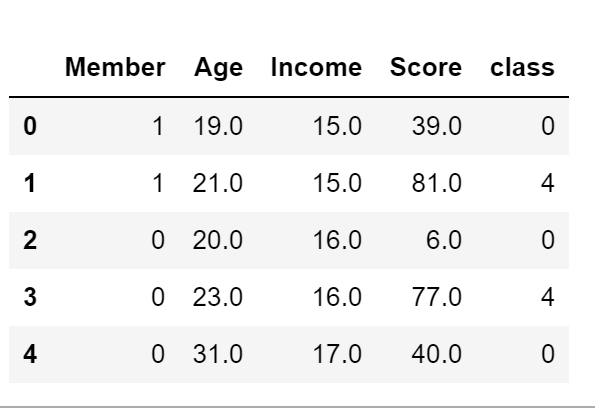

In [ ]:
# run the function for K = 6
six_clusters = get_clusters(6, df_shopping)
six_clusters.head()

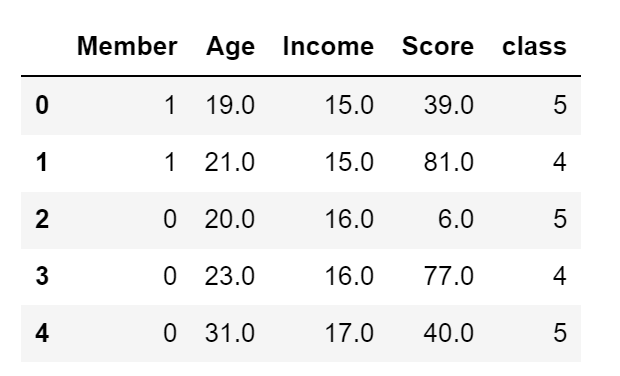

In [ ]:
# Plotting the 2D-Scatter with x='Annual Income' and y= 'Spending Score (1-100)'
five_clusters.hvplot.scatter(x='Annual Income', y='Spending Score (1-100)', by 'class')

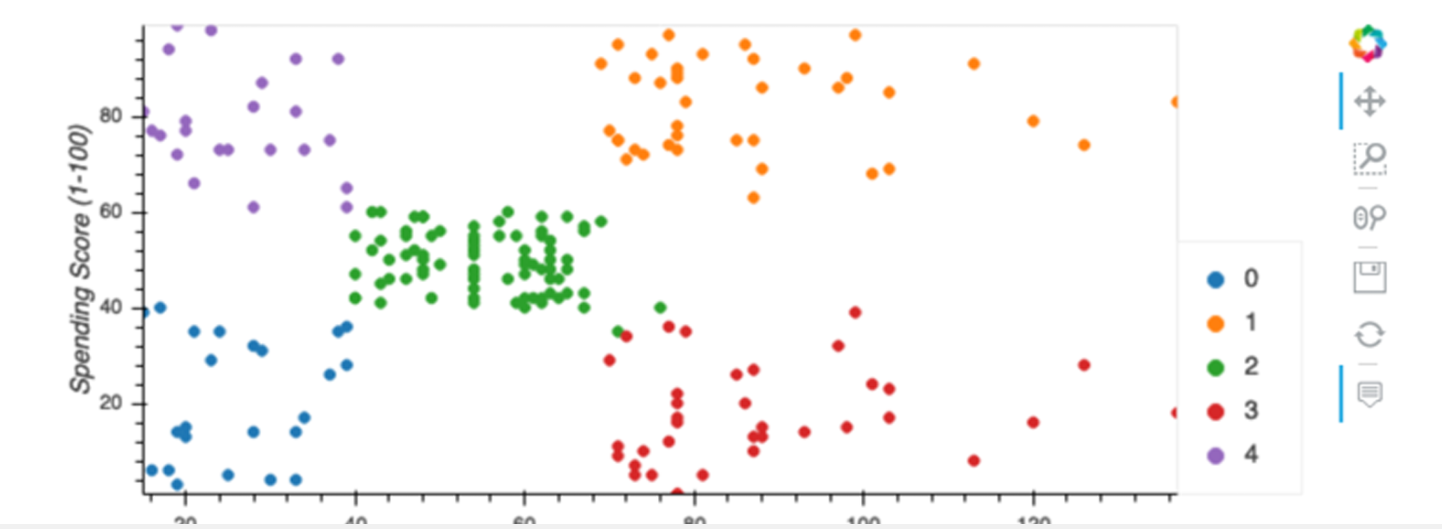

In [ ]:
# Plot the 3D-scatter with x="Annual Income", y="Spending Score (1-100)" and z="Age"
fig = px.scatter_3d(
    five_clusters,
    x="Age",
    y="Spending Score (1-100)",
    z="Annual Income",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

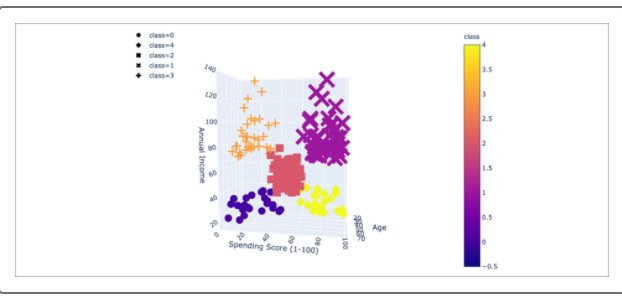

In [ ]:
# Plotting the 2D-Scatter with x='Annual Income' and y= 'Spending Score (1-100)'
six_clusters.hvplot.scatter(x='Annual Income', y='Spending Score (1-100)', by 'class')

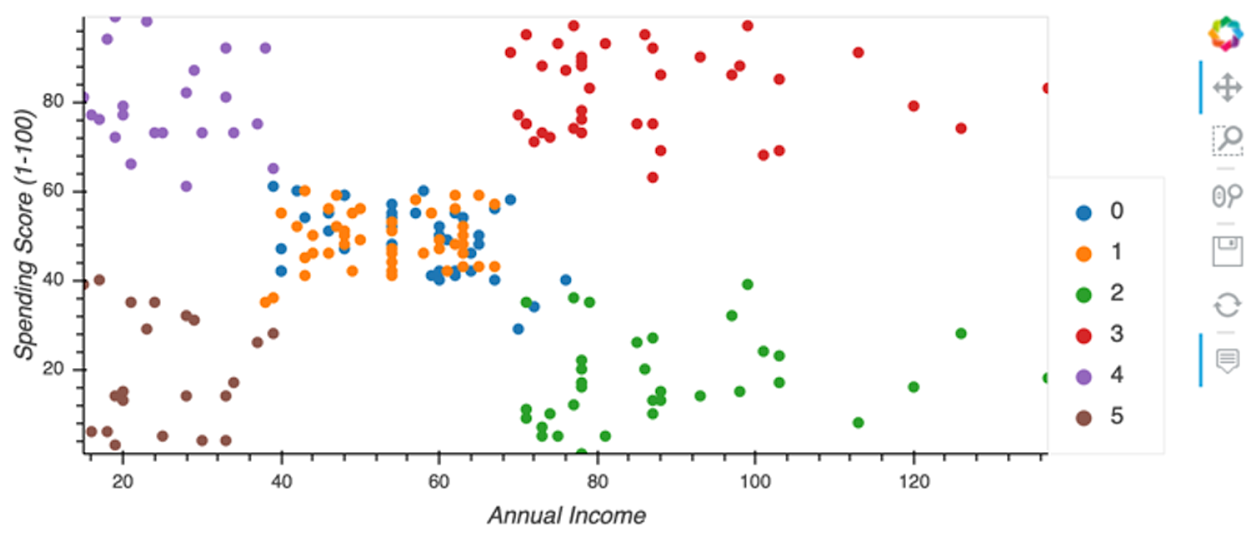

In [ ]:
# Plotting the 3D-Scatter with x="Annual Income", y="Spending Score (1-100)" and z="Age"
fig = px.scatter_3d(
    six_clusters,
    x="Age",
    y="Spending Score (1-100)",
    z="Annual Income",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

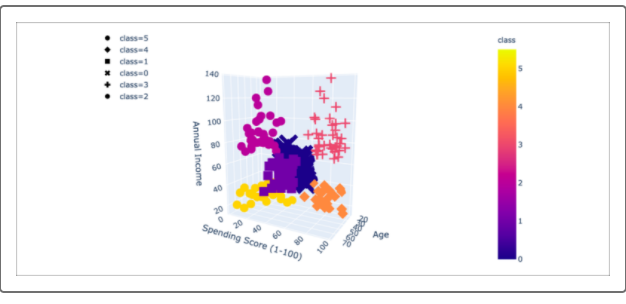

Recall, in the trial-and-error method, both graphs displayed multiple clusters. We're still applying some trial and error here, but the elbow curve helps narrow down the number of clusters.

Now, the important question: So do we use five or six groups? This depends on what insights you can take away from the data. One might conclude that six groups would be most useful because they could be broken down like so:

Cluster 0: medium income, low annual spend
Cluster 1: low income, low annual spend
Cluster 2: high income, low annual spend
Cluster 3: low income, high annual spend
Cluster 4: medium income, high annual spend
Cluster 5: very high income, high annual spend

If we choose five groups, they would need to be different and would not fit into what you're looking for, which is grouping types of customers based on spending habits. Remember, unsupervised learning can help us make decisions about the data, up to a point, then it is up to you, the expert, to make the final call.

So far, you've learned that when dealing with multiple features, the clusters were best viewed in 3D graphs, which can get messy. In the next section, we'll learn how to limit or combine features.